<a href="https://colab.research.google.com/github/P-4-PRATYUSH-RANJAN/ML_using_python/blob/main/simple_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount("/content/drive/")


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv('/content/drive/MyDrive/ML_Dataset /linear_regression_dataset/ML_Dataset_CO2Emission.csv - ML_Dataset_CO2Emission.csv')
print('shape of dataset:',df.shape)
print('columns: ',df.columns)
df.describe()

shape of dataset: (1067, 4)
columns:  Index(['Engine_Size', 'Cylinders', 'Fuel_Consumption', 'CO2_Emissions'], dtype='object')


,Engine_Size,Cylinders,Fuel_Consumption,CO2_Emissions
count,1067.000000,1067.000000,1067.000000,1067.000000
mean,3.346298,5.794752,13.296532,256.228679
std,1.415895,1.797447,4.101253,63.372304
min,1.000000,3.000000,4.600000,108.000000
25%,2.000000,4.000000,10.250000,207.000000
50%,3.400000,6.000000,12.600000,251.000000
75%,4.300000,8.000000,15.550000,294.000000
max,8.400000,12.000000,30.200000,488.000000


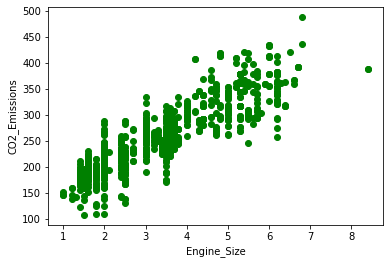

In [6]:
plt.xlabel('Engine_Size')
plt.ylabel('CO2_Emissions')
plt.scatter(df.Engine_Size,df.CO2_Emissions,color = 'green')
plt.show()

In [7]:
from sklearn.model_selection import train_test_split
training_data, testing_data = train_test_split(df,test_size=0.2, random_state=0)
print(training_data.head)
print(testing_data.head)



<bound method NDFrame.head of       Engine_Size  Cylinders  Fuel_Consumption  CO2_Emissions
270           3.6          6              14.6            290
1006          4.6          8              16.9            347
728           3.5          6              12.1            244
992           2.5          4              10.6            218
702           1.5          4               8.0            170
...           ...        ...               ...            ...
1033          2.0          4               7.9            186
763           3.5          6              17.8            256
835           3.7          6              13.5            269
559           5.0          8              15.8            306
684           3.7          6              13.1            262

[853 rows x 4 columns]>
<bound method NDFrame.head of       Engine_Size  Cylinders  Fuel_Consumption  CO2_Emissions
766           5.5          8              17.2            356
204           2.4          4              10.5 

In [14]:
from sklearn import linear_model
slr = linear_model.LinearRegression()
train_x = np.asanyarray(training_data[['Engine_Size']])
train_y = np.asanyarray(training_data[['CO2_Emissions']])
slr.fit(train_x, train_y)



print("X Coefficient: ", slr.coef_)
print("Y Intercept: ", slr.intercept_)

X Coefficient:  [[39.24838431]]
Y Intercept:  [126.18920155]


In [16]:
from sklearn.metrics import r2_score
test_x = np.asanyarray(testing_data[['Engine_Size']])
test_y = np.asanyarray(testing_data[['CO2_Emissions']])
test_y_ =slr.predict(test_x)
print('Mean absolute error : %.2f' % np.mean(np.absolute(test_y_ - test_y)))
print('Residual sum of squares (MSE): %.2f' % np.mean((test_y_ - test_y)**2))
print('R2-score : %.2f' % r2_score(test_y,test_y_))

Mean absolute error : 25.57
Residual sum of squares (MSE): 1181.53
R2-score : 0.72
